# Example: number of parameters in non-linear models

$$y = \sum_k b_k \cdot f_k(x) $$

$$y = \sum_k b_k \cdot x^k $$

In [138]:
N = 80
P = 5
# num_actual_predictors = 7
# y = np.random.randint(10, size=(N))
# betas = np.zeros(P)
# betas[np.random.randint(P, size = num_actual_predictors )] = 1.0
X = np.nan* np.ones((N,P))

X[:,0] = 2.0*np.random.randn(N,)

for pp in range(1, P-P//2):
    X[:,pp] = X[:,0]**pp
 
for pp in range( P-P//2, P):
    X[:,pp] = 1.0*np.random.randn(N,)

sigma = 1.2
noise = sigma*np.random.rand(N)
# y = X.dot(betas) + noise
y = np.cos(np.pi*2/3 +X[:,0]) + noise
# y = 0.05*X[:,0]**2 + noise
# y = np.cos(X[:,0]) + noise
# X.shape

## Note:
our predictive model does not match the ground truth

[as a rule, we cannot know how the data is generated in the real world](https://en.wikipedia.org/wiki/All_models_are_wrong)

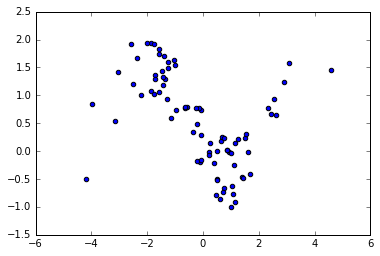

In [139]:
plt.scatter(X[:,0], y)

In [140]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=3)
mo = {}

mo["lr"] = LinearRegression()
mo["lr"].fit(X_train, y_train,)
mo["lr"]

mo["elastic_net"] = ElasticNetCV(l1_ratio=0.5, cv=5)
mo["elastic_net"].fit(X_train, y_train,)
mo["elastic_net"]

mo["lasso"] = LassoCV(cv=5)
mo["lasso"].fit(X_train, y_train,)
mo["lasso"]

mo["ridge"] = RidgeCV(cv=5)
mo["ridge"].fit(X_train, y_train,)
mo["ridge"]

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [141]:
print("R^2 in-sample:")
{kk: "%.4f" % vv.score(X_train, y_train ) for kk,vv in mo.items()}

R^2 in-sample:


{'elastic_net': '0.2308', 'lasso': '0.2313', 'lr': '0.2679', 'ridge': '0.2673'}

In [142]:
print("R^2 of prediction:")
{kk: "%.4f" % vv.score(X_test, y_test ) for kk,vv in mo.items()}

R^2 of prediction:


{'elastic_net': '0.0382',
 'lasso': '0.0380',
 'lr': '-0.0513',
 'ridge': '-0.0194'}

ridge -0.019437315484
lr -0.0513318060095
elastic_net 0.0382387654266
lasso 0.0379982257847


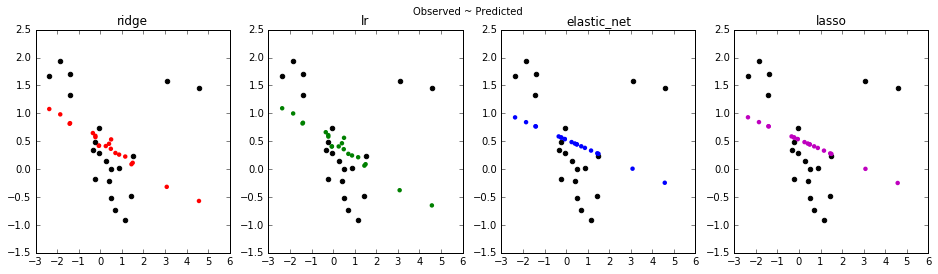

In [143]:
yhats = {}
colors = ['r', 'g', 'b', 'm', 'c']
fig, axs = plt.subplots(1,4, figsize=(16, 4))

plt.suptitle("Observed ~ Predicted")
for (kk,vv), ax,cc in zip(mo.items(), axs, colors):
# for (kk, vv), cc in zip(mo.items(), colors):
    yhats[kk] = vv.predict(X_test)
    print(kk, vv.score(X_test, y_test))
    order = np.argsort(yhats[kk])
    ax.scatter(X_test[:,0], y_test, c='k')
#     ax.plot(X_test[:,0][order], yhats[kk][order], label = kk, c = cc, lw=2)
    ax.scatter(X_test[:,0][order], yhats[kk][order], label = kk, c = cc, edgecolors='none')
#     ax.plot(yhats[kk][order], y_test[order], label = kk,c = cc)
    ax.set_title(kk)

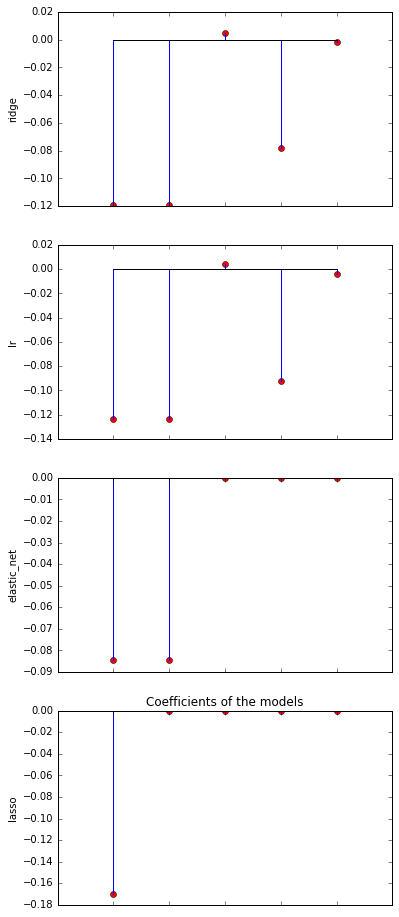

In [144]:
fig, axs = plt.subplots(4, figsize=(6, 16))

plt.title("Coefficients of the models")
for (kk,vv), ax in zip(mo.items(), axs):
    ax.stem(vv.coef_, markerfmt="ro", basefmt='k'+"-")
    ax.set_ylabel(kk)
    ax.set_xticklabels([])
    ax.set_xlim([-1, X.shape[1] ])
pass